## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Reading the data 
df = pd.read_csv('train.csv')

To get a basic understanding of the data, we can start by examining the first few rows of the dataset:

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Dropping unecessory column (Passenger Id)

In [7]:
df.drop('PassengerId', axis=1, inplace= True)

In [8]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# Exploratory Data Analysis

First, we will create few functions to change categorical feature data into words which will be helpfull for further analysis in creating Pivot Charts.
Then we will aplly thesse functions to create new columns from existing ones using lambda functions.

In [10]:
def survived_to_words(num):
    num_map = {0: 'Not Survived', 1: 'Survived'}
    return num_map[num]

In [11]:
# Checking our Function
survived_to_words(0)

'Not Survived'

In [12]:
# Creating NewSurvived Column
df['NewSurvived'] = df['Survived'].apply(lambda x : survived_to_words(x))
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewSurvived
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Survived
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Not Survived


In [13]:
# Creaating a function to change Pclass
def pclass_to_words(num):
    num_map = {1:'First', 2:'Second', 3:'Third'}
    return num_map[num]

In [14]:
# Checking our Function
pclass_to_words(3)

'Third'

In [15]:
# Making a new column NewPclass
df['NewPclass'] = df['Pclass'].apply(lambda x: pclass_to_words(x))
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewSurvived,NewPclass
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Survived,Third
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Third
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Not Survived,Third


In [16]:
# Making a column NewSex
def sex_to_numeric(word):
    word_map = {'male': 0, 'female': 1}
    return word_map[word]

In [17]:
df['NewSex'] = df['Sex'].apply(lambda x: sex_to_numeric(x))

## Creating Pivot tables to see relationships of features with Survival

Creating functions to make Pivot Tables 

In [18]:
# fuction to create pivot table
def make_pivot(index, df):
    pivot = df.pivot_table(index=index, columns= 'NewSurvived', values='Survived', aggfunc='count')
    return pivot
# fuction to apply percentage
def apply_percentage(pivot):
    total = pivot['Not Survived'] + pivot['Survived']
    pivot = pivot.apply(lambda x: x/total).applymap('{:.2%}'.format)
    return pivot


## Checking Survival by Sex

In [19]:
pivot_by_sex = make_pivot('Sex', df)
pivot_by_sex

NewSurvived,Not Survived,Survived
Sex,,
female,81,233
male,468,109


We can see female survived more. To be more specific, we can apply our apply_percentage function.

In [20]:
apply_percentage(pivot_by_sex)

NewSurvived,Not Survived,Survived
Sex,,
female,25.80%,74.20%
male,81.11%,18.89%


Now , picture is more clear. Around out of 100% around 74% female survived and on the other hand, male survival is only about 19%.

<AxesSubplot:xlabel='Sex'>

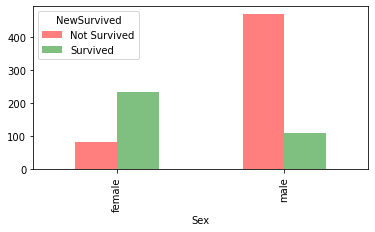

In [21]:
# Create a simple bar chart
pivot_by_sex.plot(kind='bar', figsize=(6, 3), color=['r', 'g'], alpha=0.5)

## Checking Survival by Class

In [22]:
pivot_by_class = make_pivot('NewPclass',df)
pivot_by_class

NewSurvived,Not Survived,Survived
NewPclass,,
First,80,136
Second,97,87
Third,372,119


In [23]:
apply_percentage(pivot_by_class)

NewSurvived,Not Survived,Survived
NewPclass,,
First,37.04%,62.96%
Second,52.72%,47.28%
Third,75.76%,24.24%


We can see that, Pclass is the feature that has major impact on survival. Passenger who blong to lower Pclass has less chances of surviving.

<AxesSubplot:xlabel='NewPclass'>

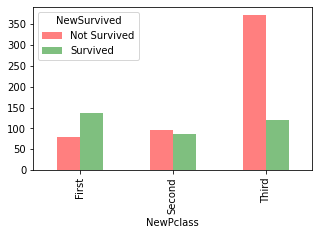

In [24]:
pivot_by_class.plot(kind='bar', color=['red', 'green'], figsize=(5, 3), alpha=0.5)

## Survival by Sex and Class both

In [25]:
pivot_by_class_and_sex = make_pivot(['NewPclass','Sex'], df)
pivot_by_class_and_sex

NewSurvived       Not Survived  Survived
NewPclass Sex                           
First     female             3        91
          male              77        45
Second    female             6        70
          male              91        17
Third     female            72        72
          male             300        47

In [26]:
apply_percentage(pivot_by_class_and_sex)

NewSurvived      Not Survived Survived
NewPclass Sex                         
First     female        3.19%   96.81%
          male         63.11%   36.89%
Second    female        7.89%   92.11%
          male         84.26%   15.74%
Third     female       50.00%   50.00%
          male         86.46%   13.54%

We can see that if female belonging to '**First**' class almost have 97% survial chance, same for female in **Second** calss, a good percentage is there, whereas female belonging to '**Third**' has 50-50% chance of survival.
on the other hand, male only good percentage in **First** Class, while other two are not good for male.

<AxesSubplot:xlabel='NewPclass,Sex'>

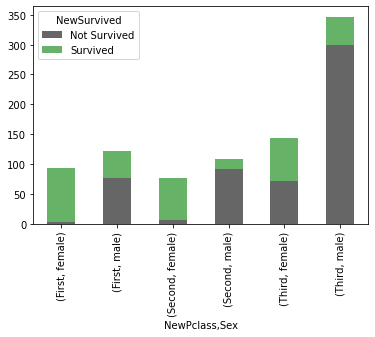

In [27]:
pivot_by_class_and_sex.plot(kind='bar', stacked='True', color=['k', 'g'], alpha=0.6, figsize=(6,4))

## Impact of age on Survival, we can use a frequency table here to make pivot.

## Frequency Table

In [28]:
age_groups = pd.cut(df['Age'], bins=range(0, 85, 5))
age_groups

0      (20.0, 25.0]
1      (35.0, 40.0]
2      (25.0, 30.0]
3      (30.0, 35.0]
4      (30.0, 35.0]
           ...     
886    (25.0, 30.0]
887    (15.0, 20.0]
888             NaN
889    (25.0, 30.0]
890    (30.0, 35.0]
Name: Age, Length: 891, dtype: category
Categories (16, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (60, 65] < (65, 70] < (70, 75] < (75, 80]]

In [29]:
pd.value_counts(age_groups, sort=False)

(0, 5]       44
(5, 10]      20
(10, 15]     19
(15, 20]     96
(20, 25]    122
(25, 30]    108
(30, 35]     88
(35, 40]     67
(40, 45]     47
(45, 50]     39
(50, 55]     24
(55, 60]     18
(60, 65]     14
(65, 70]      3
(70, 75]      4
(75, 80]      1
Name: Age, dtype: int64

In [30]:
freq_table = make_pivot(age_groups, df)
freq_table

NewSurvived,Not Survived,Survived
Age,,
"(0, 5]",13,31
"(5, 10]",13,7
"(10, 15]",8,11
"(15, 20]",63,33
"(20, 25]",80,42
"(25, 30]",66,42
"(30, 35]",47,41
"(35, 40]",39,28
"(40, 45]",30,17


## Survival by Age

<AxesSubplot:xlabel='Age'>

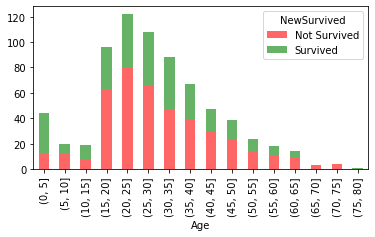

In [31]:
freq_table.plot(kind='bar', alpha=0.6, figsize=(6,3), stacked=True, color=["red",'green'])

## Making a displot

Making a displo showing features impacting survial. Features include **Age** on X- axix. **NewPclass** is taken as row and 'Sex on column. It shows more clear picture. 

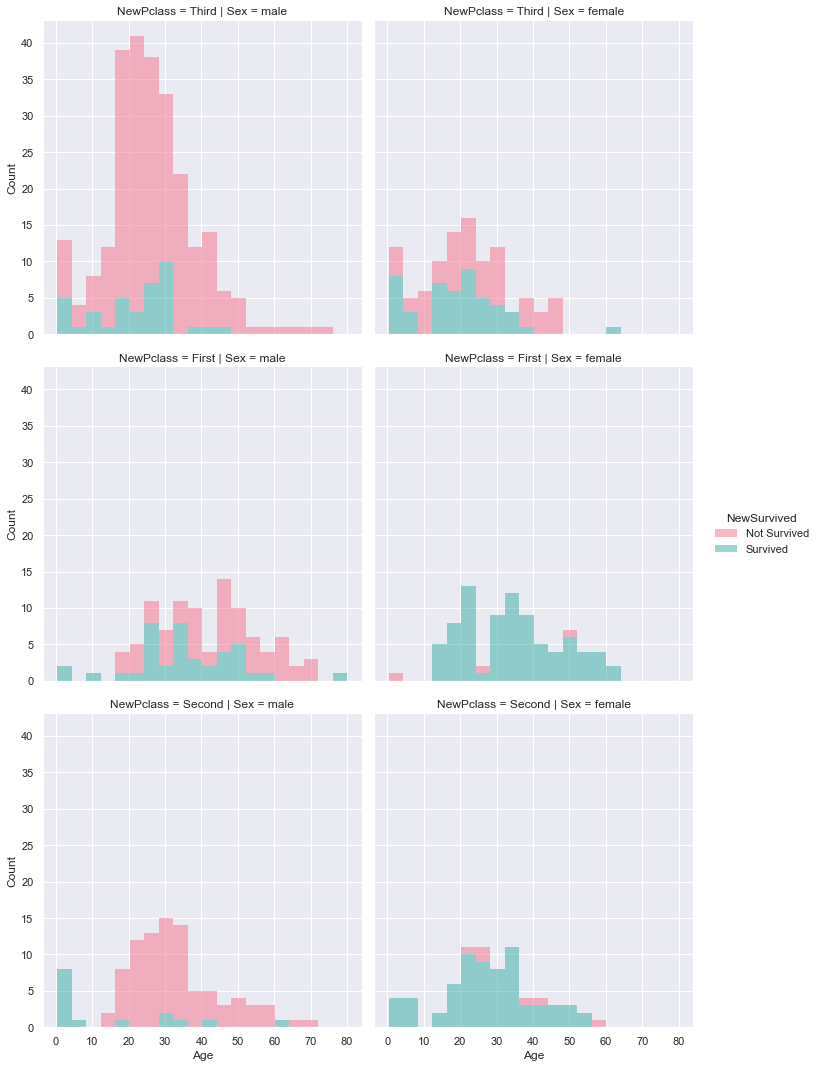

In [32]:
sns.set(rc={"figure.figsize":(3, 2)}) 
sns.displot(data=df, x='Age', hue='NewSurvived', row='NewPclass', col="Sex" , kind='hist', 
           multiple='stack', palette='husl', alpha=0.5, linewidth=0)

## Survival Count by Embarked Port, Class, and Sex

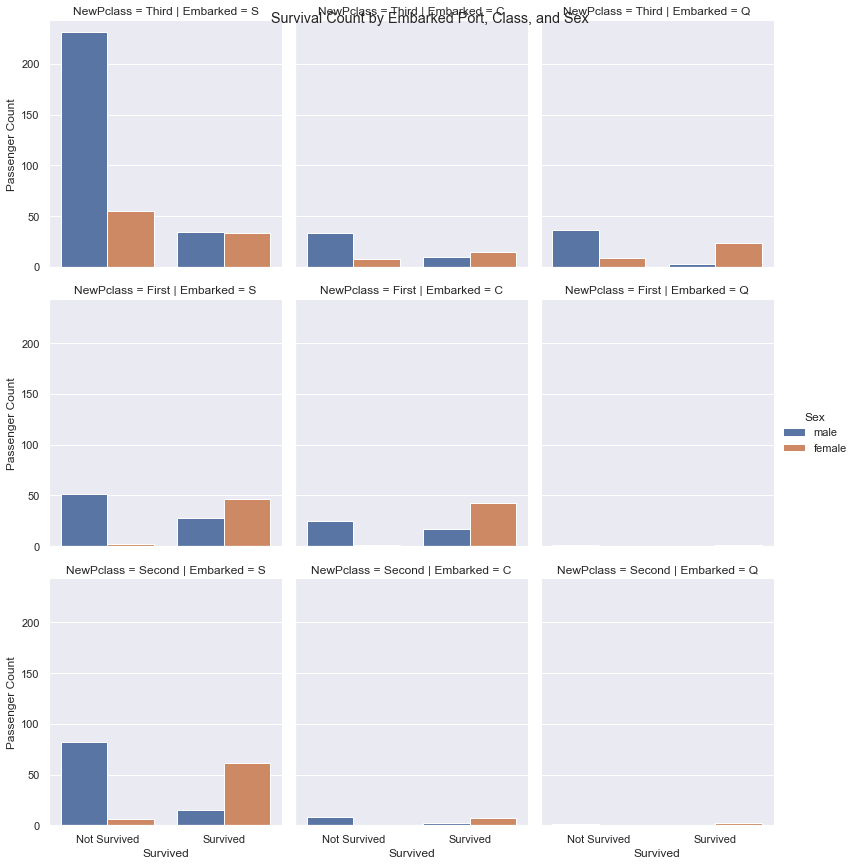

In [33]:
sns.set(rc={"figure.figsize":(3, 2)})
g = sns.catplot(x='NewSurvived', col='Embarked', hue='Sex', row='NewPclass', data=df, kind='count', height=4, aspect=0.9)

# Set the axis labels and title
g.set_xlabels('Survived')
g.set_ylabels('Passenger Count')
g.fig.suptitle('Survival Count by Embarked Port, Class, and Sex')
plt.show()

## Scatter Plot to show Sge and FamilySIze relation with Survival

In [34]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewSurvived,NewPclass,NewSex
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Survived,Third,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Third,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Not Survived,Third,0


Making a new colum FamilySize

In [35]:
df['FamilySize'] = df['SibSp'] + df['Parch']

In [36]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewSurvived,NewPclass,NewSex,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Survived,Third,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Third,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Not Survived,Third,0,0


<AxesSubplot:xlabel='Age', ylabel='FamilySize'>

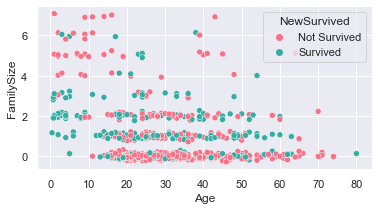

In [37]:
sns.set(rc={"figure.figsize":(6, 3)}) #width=8, height=4

sns.scatterplot(data=df, x=df['Age'], 
                y=df['FamilySize'] + np.random.normal(loc = 0, scale=0.1, size=len(df)), 
                hue='NewSurvived', palette='husl' )

We can see some relation there , if we look at **FamilySize** == 0 that is passenger travilling alone we can see that there are more red dots around 18 to 40 years of age. Which shows that people travelling alone have less chance of survival comparatively.

## Insights-
1) Female has good chance of survival overall but if take another factor Passenger Class with female, than female has more than 90% chance of survival in for First and Second Class while 50 % in Third Class

2) Male does not not have good chance of survival, only for First Class it has about 63% chance of Survival

3) Passenger Travelling alone has less chance of survival

4) Kids has good chance of Survival


# Model Predictions

In [38]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewSurvived,NewPclass,NewSex,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Survived,Third,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Third,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Not Survived,Third,0,0


In [39]:
filter = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'NewSurvived', 'NewPclass'], axis=1)
filter

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,NewSex,FamilySize
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,1
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,1
4,0,3,35.0,0,0,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0,0
887,1,1,19.0,0,0,30.0000,S,1,0
888,0,3,NaN,1,2,23.4500,S,1,3
889,1,1,26.0,0,0,30.0000,C,0,0


Changing categorical features into number one hot encoding

In [40]:
filter_new = pd.get_dummies(filter, drop_first=True)
filter_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,NewSex,FamilySize,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,1,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,1


In [41]:
filter_new.isna().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
NewSex          0
FamilySize      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [42]:
# Replacing null values mean of age for age
filter_new['Age'].fillna(filter_new['Age'].mean(), inplace=True)

In [43]:
# Importing Logistic Regression model from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [44]:
X = filter_new.drop('Survived', axis=1)

In [45]:
X.head(3)

,Pclass,Age,SibSp,Parch,Fare,NewSex,FamilySize,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,1
1,1,38.0,1,0,71.2833,1,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,1


In [46]:
y= filter_new['Survived']

In [47]:
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

## Splitting Data into Train, Test

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
len(X_train), len(X_test)

(712, 179)

## Creating and fitting a model

In [50]:
model_lgr = LogisticRegression(max_iter=1000)
model_lgr

LogisticRegression(max_iter=1000)

In [51]:
model_lgr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Checking Score on Training data first

In [52]:
model_lgr.score(X_train, y_train)

0.8019662921348315

Checking on Test Data

In [53]:
model_lgr.score(X_test, y_test)

0.8100558659217877

This model predicted with 81% 

## Making a confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
cm = confusion_matrix(y_true=y_test, y_pred=model_lgr.predict(X_test))
cm

array([[90, 15],
       [19, 55]], dtype=int64)

Text(12.5, 0.5, 'Prediction')

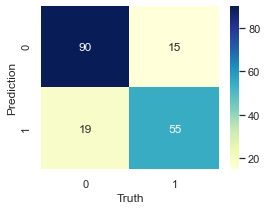

In [56]:
import seaborn as sns
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True,cmap='YlGnBu', fmt='g')
plt.xlabel('Truth')
plt.ylabel('Prediction')

In [57]:
filter.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,NewSex,FamilySize
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,1
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,1
4,0,3,35.0,0,0,8.0500,S,0,0


Let's Drop some of the features and than predict

In [58]:
filter_0 = filter.drop(['Fare', 'Embarked', 'FamilySize'], axis=1)


In [59]:
filter_0.head()

,Survived,Pclass,Age,SibSp,Parch,NewSex
0,0,3,22.0,1,0,0
1,1,1,38.0,1,0,1
2,1,3,26.0,0,0,1
3,1,1,35.0,1,0,1
4,0,3,35.0,0,0,0


In [60]:
filter_0.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
NewSex        0
dtype: int64

In [61]:
filter_0['Age'].fillna(filter_0['Age'].mean(), inplace=True)

In [62]:
X = filter_0.drop('Survived', axis=1)

In [63]:
X.head(2)

,Pclass,Age,SibSp,Parch,NewSex
0,3,22.0,1,0,0
1,1,38.0,1,0,1


In [64]:
y= filter_0['Survived']
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
model_lgr_0 = LogisticRegression()
model_lgr_0.fit(X_train, y_train)

LogisticRegression()

In [67]:
model_lgr_0.score(X_test, y_test)

0.8268156424581006

This time predicted with 82.6 %

In [68]:
cm = confusion_matrix(y_true=y_test, y_pred=model_lgr_0.predict(X_test))
cm

array([[93, 12],
       [19, 55]], dtype=int64)

Text(0.5, 12.5, 'Truth')

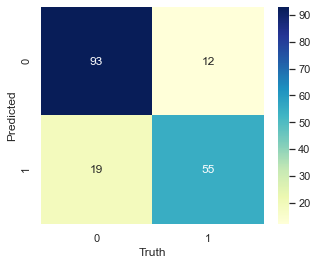

In [69]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap = 'YlGnBu', fmt='g')
plt.ylabel('Predicted')
plt.xlabel('Truth')

## Decision Tree Model


In [70]:
from sklearn import tree

In [71]:
model_tree = tree.DecisionTreeClassifier(criterion='entropy', splitter='random')
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [72]:
model_tree.score(X_test, y_test)

0.8044692737430168

Not good, only 78%

Text(0.5, 12.5, 'Truth')

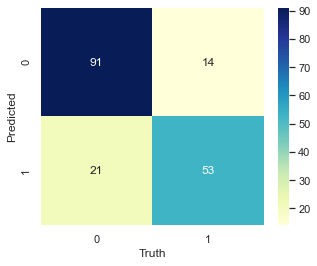

In [73]:
cm = confusion_matrix(y_true=y_test, y_pred=model_tree.predict(X_test))
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap = 'YlGnBu', fmt='g')
plt.ylabel('Predicted')
plt.xlabel('Truth')

## Try SVM

In [74]:
from sklearn.svm import SVC

In [75]:
model_svm = SVC(C=20)
model_svm.fit(X_train, y_train)

SVC(C=20)

In [76]:
model_svm.score(X_test, y_test)

0.7932960893854749

<AxesSubplot:>

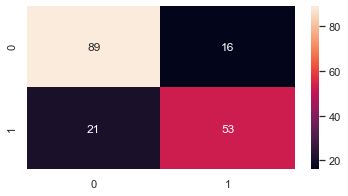

In [77]:
cm_svm = confusion_matrix(y_test, model_svm.predict(X_test))
sns.heatmap(cm_svm, annot=True, fmt='g')

Checking accuracy for the following model

model_lgr_0,
model_tree,
model_svm,

In [78]:
#Predict the test data
y_pred = model_lgr_0.predict(X_test)

# Calculate performance metrics

In [79]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [80]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [81]:
# Print the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")
print(f"F1 Score: {f1}")

Accuracy: 0.8268156424581006
Balanced Accuracy: 0.8144787644787644
Precision: 0.8208955223880597
Recall: 0.7432432432432432
ROC-AUC: 0.8144787644787644
F1 Score: 0.7801418439716312


This performance metrics evaluation is for LogisticRegression model, Try with other, also use Random Forest and XGBoost, and see accuracy of the model icreases or decreases.